In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
sns.set()

In [ ]:
raw_data = pd.read_csv('data/raw/1.04. Real life example - Data Science Bootcamp.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,S 350
4341,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,535
4342,BMW,8000.00,sedan,194,2.00,Petrol,yes,1985,520
4343,Toyota,14200.00,sedan,31,NaN,Petrol,yes,2014,Corolla


In [180]:
data = raw_data.drop(['Model'],axis=1)
data.describe()

,Price,Mileage,EngineV,Year
count,4173.00,4345.00,4195.00,4345.00
mean,19418.75,161.24,2.79,2006.55
std,25584.24,105.71,5.07,6.72
min,600.00,0.00,0.60,1969.00
25%,6999.00,86.00,1.80,2003.00
50%,11500.00,155.00,2.20,2008.00
75%,21700.00,230.00,3.00,2012.00
max,300000.00,980.00,99.99,2016.00


In [181]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [182]:
dataNoMV = data.dropna(axis=0)

In [183]:
dataNoMV.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.00,4025,4025.00,4025.00,4025,4025,4025.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.31,NaN,163.57,2.76,NaN,NaN,2006.38
std,NaN,25815.73,NaN,103.39,4.94,NaN,NaN,6.70
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6999.00,NaN,90.00,1.80,NaN,NaN,2003.00
50%,NaN,11500.00,NaN,158.00,2.20,NaN,NaN,2007.00
75%,NaN,21900.00,NaN,230.00,3.00,NaN,NaN,2012.00


<Axes: xlabel='Price', ylabel='Count'>

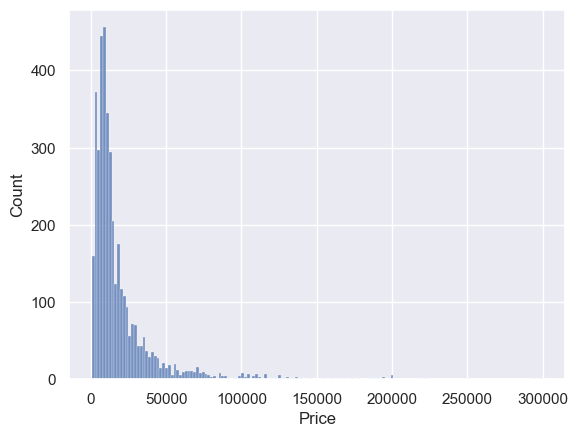

In [184]:
sns.histplot(dataNoMV['Price'])

In [185]:
q = dataNoMV['Price'].quantile(0.99)
data_1 = dataNoMV[dataNoMV['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.00,3984,3984.00,3984.00,3984,3984,3984.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.12,NaN,165.12,2.74,NaN,NaN,2006.29
std,NaN,18976.27,NaN,102.77,4.96,NaN,NaN,6.67
min,NaN,600.00,NaN,0.00,0.60,NaN,NaN,1969.00
25%,NaN,6980.00,NaN,93.00,1.80,NaN,NaN,2002.75
50%,NaN,11400.00,NaN,160.00,2.20,NaN,NaN,2007.00
75%,NaN,21000.00,NaN,230.00,3.00,NaN,NaN,2011.00


<Axes: xlabel='Price', ylabel='Count'>

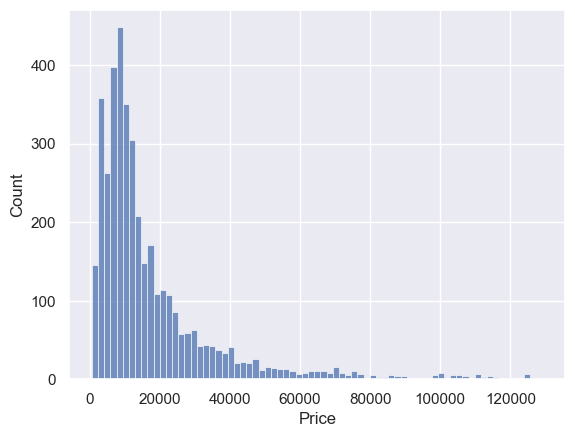

In [186]:
sns.histplot(data_1['Price'])

In [187]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<Axes: xlabel='Mileage', ylabel='Count'>

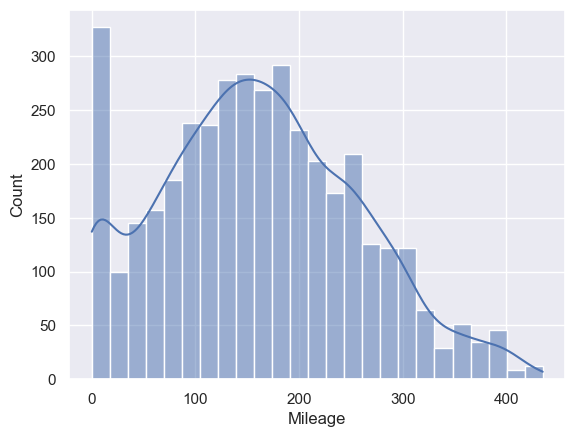

In [188]:
sns.histplot(data_2['Mileage'], kde = True)

<Axes: xlabel='EngineV', ylabel='Count'>

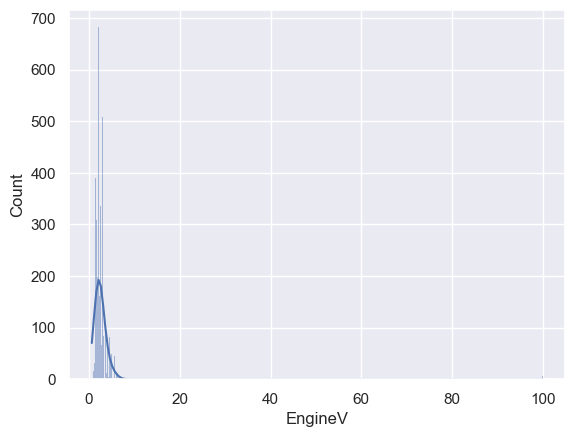

In [189]:
sns.histplot(data_2['EngineV'], kde=True)

In [190]:
data_3 = data_2[data_2['EngineV']<6.5]

<Axes: xlabel='EngineV', ylabel='Count'>

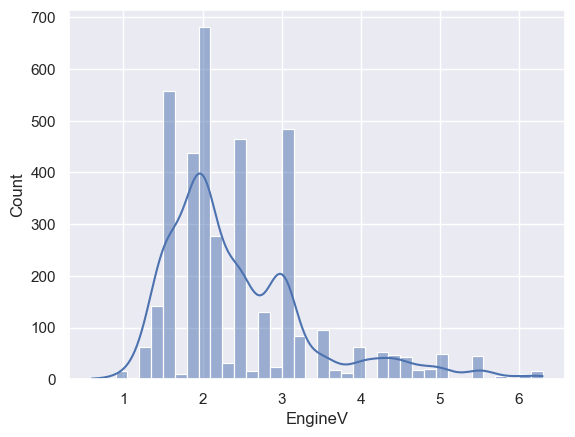

In [191]:
sns.histplot(data_3['EngineV'], kde = True)

<Axes: xlabel='Year', ylabel='Count'>

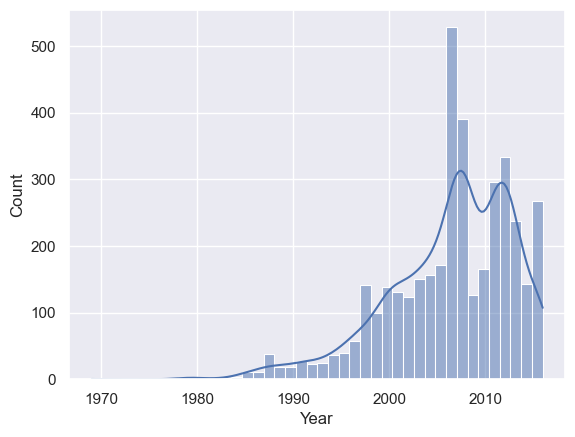

In [192]:
sns.histplot(data_3['Year'], kde = True)

In [193]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

<Axes: xlabel='Year', ylabel='Count'>

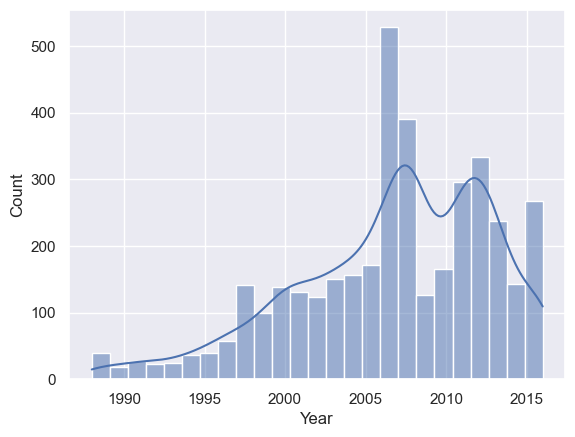

In [194]:
sns.histplot(data_4['Year'], kde = True)

In [195]:
df_cln = data_4.reset_index(drop=True)

In [196]:
df_cln.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


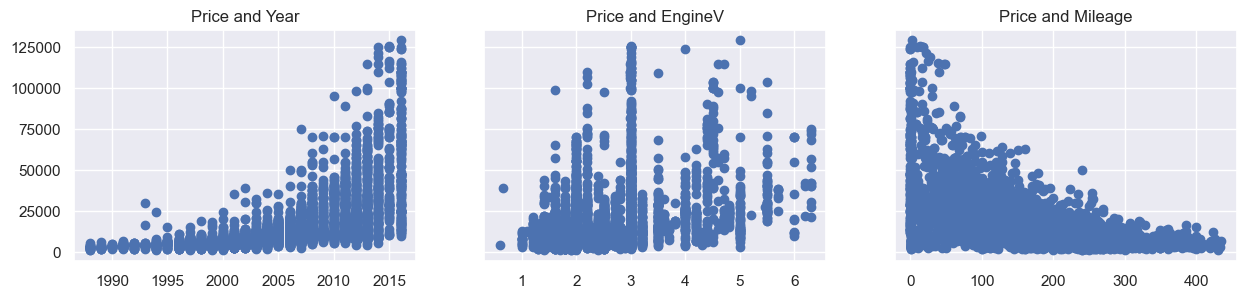

In [197]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(df_cln['Year'],df_cln['Price'])
ax1.set_title('Price and Year')
ax2.scatter(df_cln['EngineV'],df_cln['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(df_cln['Mileage'],df_cln['Price'])
ax3.set_title('Price and Mileage')

plt.show()

In [198]:
log_price = np.log(df_cln['Price'])
df_cln['log_price'] = log_price
df_cln

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,11.74
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


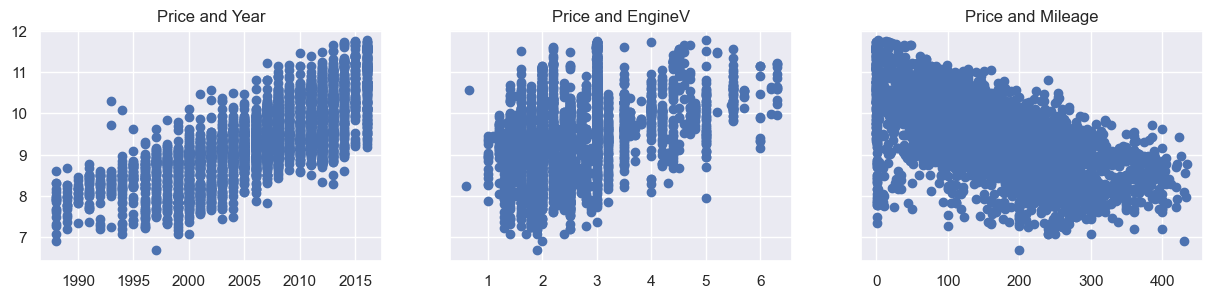

In [199]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(df_cln['Year'],df_cln['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(df_cln['EngineV'],df_cln['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(df_cln['Mileage'],df_cln['log_price'])
ax3.set_title('Price and Mileage')

plt.show()

In [200]:
df_cln = df_cln.drop(['Price'], axis = 1)

In [201]:
df_cln.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [202]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_cln[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [203]:
vif

,VIF,features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [204]:
df_noMultiColl = df_cln.drop(['Year'],axis = 1)

In [205]:
df_dummies = pd.get_dummies(df_noMultiColl, drop_first = True, dtype = int)

In [206]:
df_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.34,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.97,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.50,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.04,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.81,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [207]:
df_dummies.columns

Index(['Mileage', 'EngineV', 'log_price', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes'],
      dtype='object')

In [208]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']
df_preprocessed = df_dummies[cols]
df_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.34,277,2.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.97,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.50,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.04,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.81,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [ ]:
targets = df_preprocessed['log_price']
inputs = df_preprocessed.drop(['log_price'], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.diagnostic import het_breuschpagan

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.2, random_state = 365)

In [211]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [212]:
reg = LinearRegression()
reg.fit(x_train_scaled,y_train)

LinearRegression()

In [213]:
y_hat_train = reg.predict(x_train_scaled)
print("R2 train:", r2_score(y_train, y_hat_train))
print("RMSE train:", np.sqrt(mean_squared_error(y_train, y_hat_train)))
print("MAE train:", mean_absolute_error(y_train, y_hat_train))

R2 train: 0.744996578792662
RMSE train: 0.4393215687955533
MAE train: 0.316036190456023


In [214]:
y_hat_test = reg.predict(x_test_scaled)
print("R2 test:", r2_score(y_test, y_hat_test))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, y_hat_test)))
print("MAE test:", mean_absolute_error(y_test, y_hat_test))

R2 test: 0.7726984972665856
RMSE test: 0.4298206539563799
MAE test: 0.3157034379634969


In [215]:
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(y_hat_test - y_test, sm.add_constant(x_test_scaled))
print("Breusch-Pagan p-value (LM):", lm_pvalue)

Breusch-Pagan p-value (LM): 3.206063852380694e-06


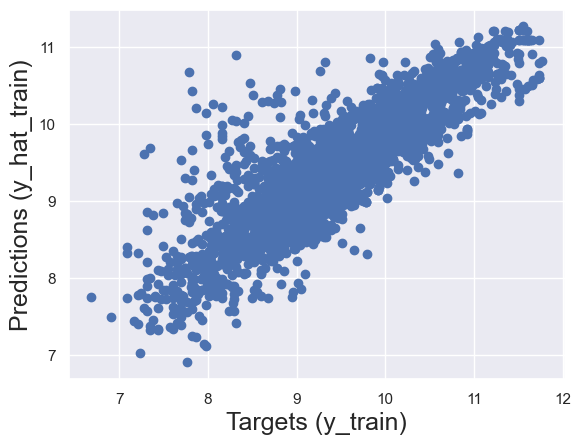

In [216]:
plt.scatter(y_train, y_hat_train)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat_train)',size=18)
plt.show()

<Axes: xlabel='log_price', ylabel='Count'>

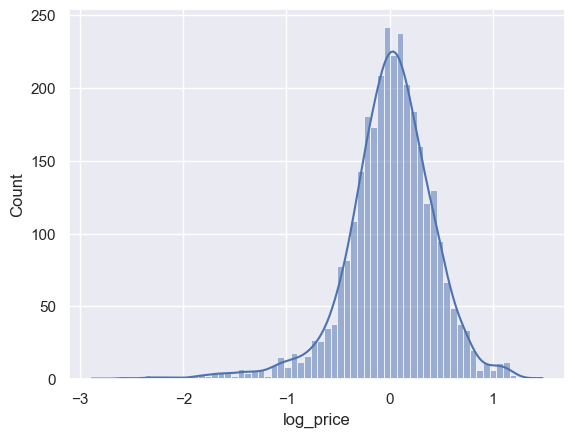

In [ ]:
sns.histplot(y_train - y_hat_train, kde = True) 

In [218]:
reg.score(x_train_scaled,y_train)

0.744996578792662

In [219]:
reg.intercept_

9.422759999441137

In [220]:
reg.coef_

array([-0.44364779,  0.20967647,  0.01415551,  0.01284213, -0.14067058,
       -0.18271002, -0.06097959, -0.08976809, -0.14366248, -0.10052678,
       -0.20051722, -0.1299767 , -0.17055131, -0.12167691, -0.03550995,
       -0.14669987,  0.31568339])

In [221]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.44
1,EngineV,0.21
2,Brand_BMW,0.01
3,Brand_Mercedes-Benz,0.01
4,Brand_Mitsubishi,-0.14
5,Brand_Renault,-0.18
6,Brand_Toyota,-0.06
7,Brand_Volkswagen,-0.09
8,Body_hatch,-0.14
9,Body_other,-0.10


In [222]:
y_hat_test = reg.predict(x_test_scaled)

y_pred = np.exp(y_hat_test)
y_test_real = np.exp(y_test)

(6.0, 13.0)

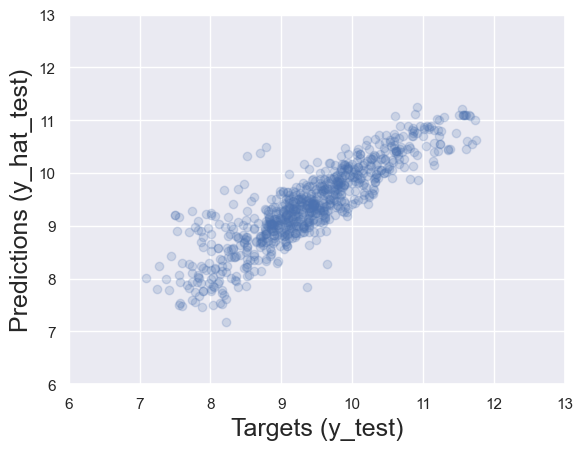

In [223]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_hat_test, alpha=0.2)
ax.set_xlabel('Targets (y_test)', fontsize=18)
ax.set_ylabel('Predictions (y_hat_test)', fontsize=18)
ax.set_xlim(6, 13)
ax.set_ylim(6, 13)

In [224]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Predictions'])
df_pf.head()

,Predictions
0,10685.50
1,3499.26
2,7553.29
3,7463.96
4,11353.49


In [225]:
y_test = y_test.reset_index(drop = True)
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,10685.50,2300.00
1,3499.26,2800.00
2,7553.29,2500.00
3,7463.96,6400.00
4,11353.49,9150.00
...,...,...
769,29651.73,29500.00
770,10732.07,9600.00
771,13922.45,18300.00
772,27487.75,68500.00


In [226]:
df_pf['Residual'] = df_pf['Predictions'] - df_pf['Target']
df_pf

,Predictions,Target,Residual
0,10685.50,2300.00,8385.50
1,3499.26,2800.00,699.26
2,7553.29,2500.00,5053.29
3,7463.96,6400.00,1063.96
4,11353.49,9150.00,2203.49
...,...,...,...
769,29651.73,29500.00,151.73
770,10732.07,9600.00,1132.07
771,13922.45,18300.00,-4377.55
772,27487.75,68500.00,-41012.25


In [227]:
pd.options.display.max_rows = 50
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf['Difference%'] = (df_pf['Predictions'] - df_pf['Target']) / df_pf['Target'] * 100
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residual,Difference%
27,2555.02,11600.00,-9044.98,-77.97
224,3939.91,15500.00,-11560.09,-74.58
221,34863.53,109999.00,-75135.47,-68.31
621,38473.71,119000.00,-80526.29,-67.67
436,40893.84,126000.00,-85106.16,-67.54
...,...,...,...,...
657,32481.05,6000.00,26481.05,441.35
162,9954.42,1800.00,8154.42,453.02
451,35956.50,6500.00,29456.50,453.18
532,10019.90,1800.00,8219.90,456.66


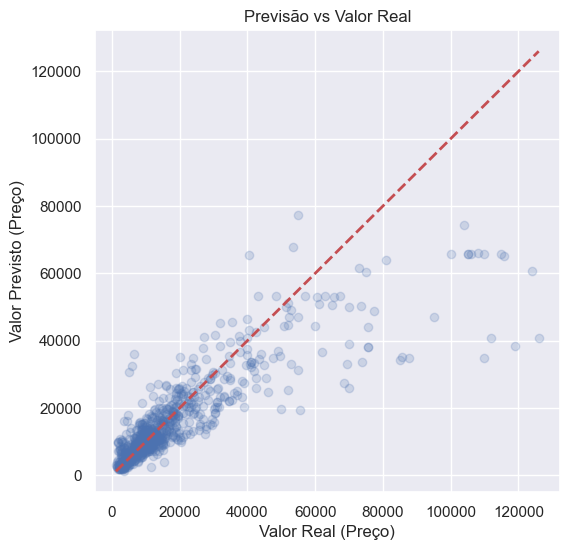

In [228]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_real, y_pred, alpha=0.2)
plt.plot([y_test_real.min(), y_test_real.max()],
         [y_test_real.min(), y_test_real.max()], 'r--', lw=2)
plt.xlabel("Valor Real (Preço)")
plt.ylabel("Valor Previsto (Preço)")
plt.title("Previsão vs Valor Real")
plt.show()